In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/cleaned_dataset.csv')

In [19]:
raw_data = pd.read_csv('../data/Electric_Vehicle_Population_Data.csv')

In [24]:
raw_data = raw_data.dropna()

In [4]:
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2523,16,27,0,98005.0,2014,41,128,0,0,103.0,0.0,41.0,186450183,261,73,5.303302e+10
1,4230,16,35,0,98011.0,2019,39,97,0,0,220.0,0.0,1.0,478093654,278,73,5.303302e+10
2,3946,33,298,0,98502.0,2025,5,163,1,0,40.0,0.0,35.0,274800718,501,72,5.306701e+10
3,6903,33,298,0,98513.0,2024,41,129,1,0,42.0,0.0,2.0,260758165,480,72,5.306701e+10
4,5280,38,382,0,98942.0,2021,39,100,0,1,0.0,0.0,15.0,236581355,178,64,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231710,4111,16,351,0,98058.0,2019,39,97,0,0,220.0,0.0,47.0,262629839,248,73,5.303303e+10
231711,1539,30,395,0,98290.0,2024,15,74,0,1,0.0,0.0,39.0,261119043,250,72,5.306105e+10
231712,5974,16,350,0,98033.0,2024,39,100,0,1,0.0,0.0,45.0,261726258,280,73,5.303302e+10
231713,7041,3,214,0,98826.0,2023,41,129,1,0,42.0,0.0,12.0,236639826,184,66,5.300796e+10


Correlations with Electric Range:
Electric Range                                       1.000000
Base MSRP                                            0.116651
Make                                                 0.050358
Legislative District                                 0.015917
Vehicle Location                                     0.015531
Postal Code                                          0.010424
City                                                 0.001766
2020 Census Tract                                   -0.006534
County                                              -0.006864
Electric Utility                                    -0.013270
Model                                               -0.073843
Electric Vehicle Type                               -0.094058
VIN (1-10)                                          -0.153675
DOL Vehicle ID                                      -0.158179
Model Year                                          -0.527790
Clean Alternative Fuel Vehicle (CAFV

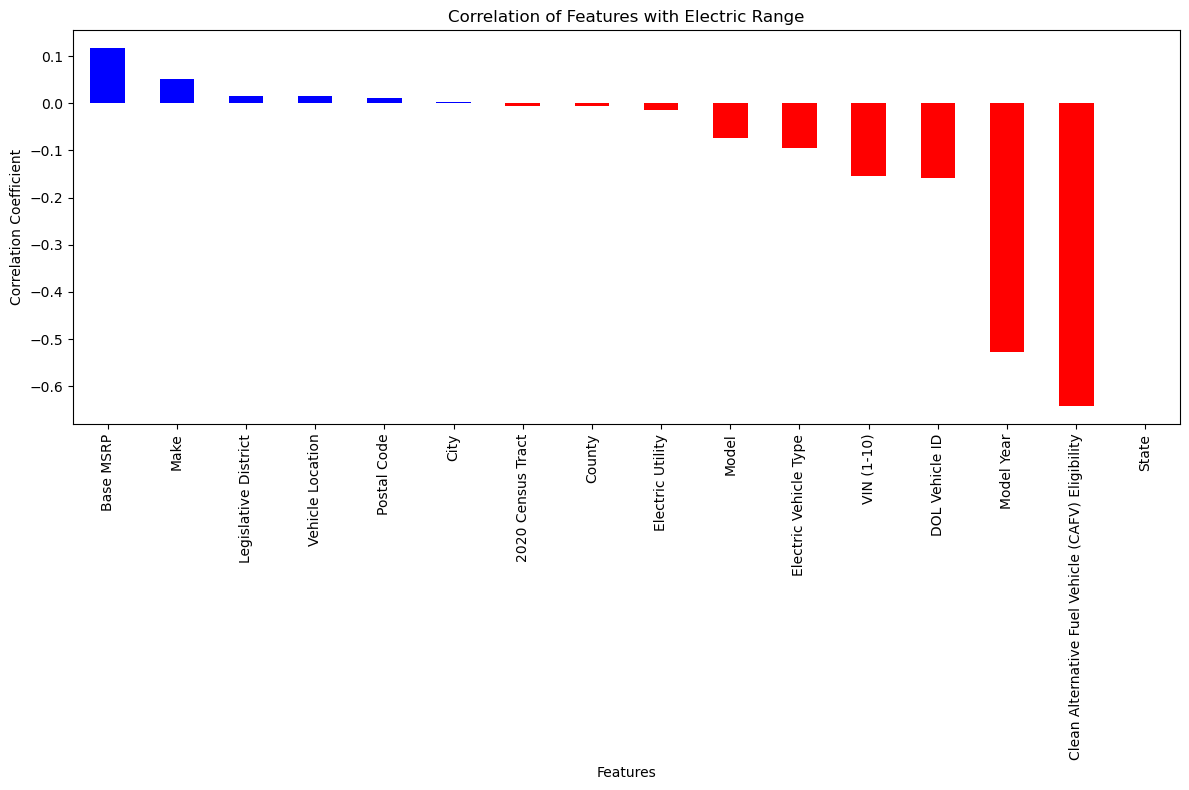

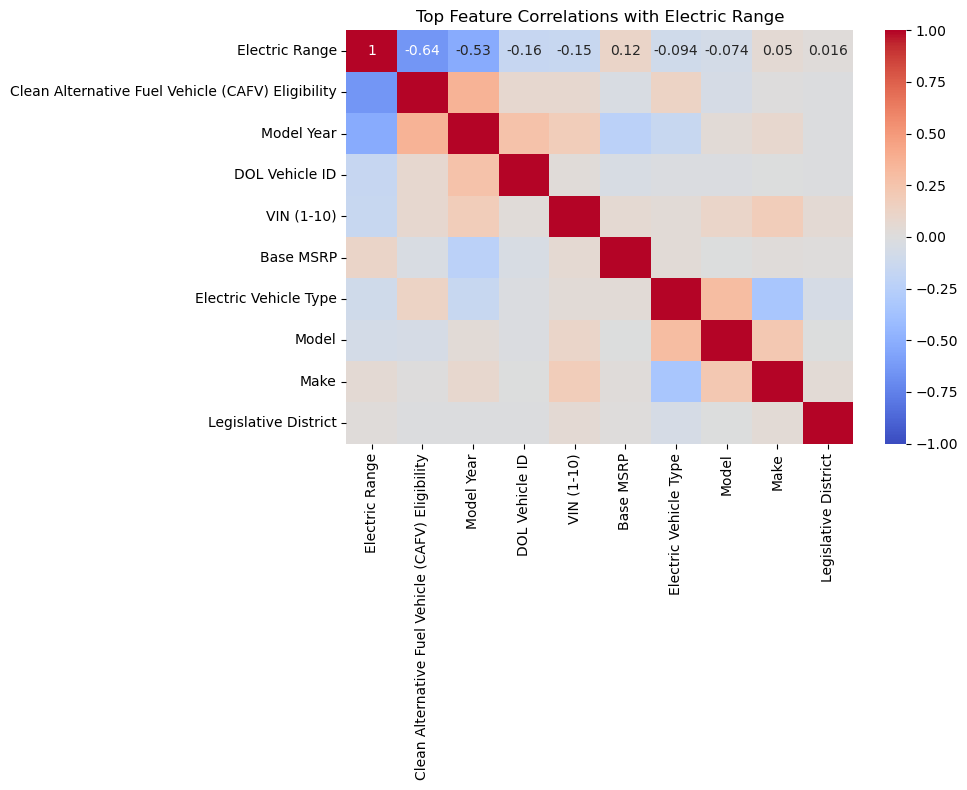

In [6]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Extract correlations with 'Electric Range'
electric_range_corr = corr_matrix['Electric Range'].sort_values(ascending=False)

# Display the correlations
print("Correlations with Electric Range:")
print(electric_range_corr)

# Create a visualization of correlations
plt.figure(figsize=(12, 8))
correlations = electric_range_corr.drop('Electric Range')
colors = ['red' if x < 0 else 'blue' for x in correlations]
correlations.plot(kind='bar', color=colors)
plt.title('Correlation of Features with Electric Range')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()

# Heatmap of top correlations
plt.figure(figsize=(10, 8))
top_features = corr_matrix.abs().nlargest(10, 'Electric Range').index
sns.heatmap(corr_matrix.loc[top_features, top_features], 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Top Feature Correlations with Electric Range')
plt.tight_layout()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


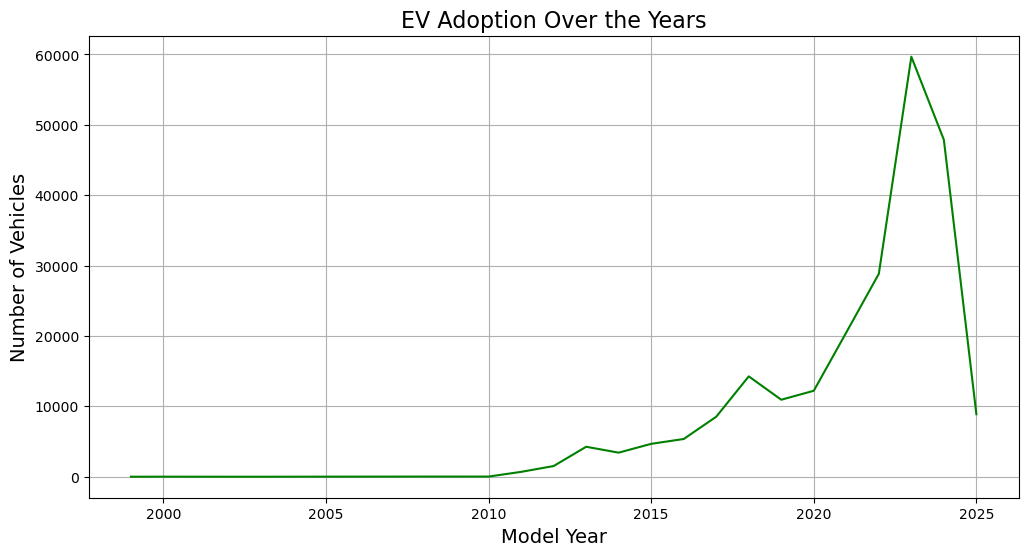

In [ ]:
evs_by_year = data['Model Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=evs_by_year.index, y=evs_by_year.values, color='g')
plt.title('EV Adoption Over the Years', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.grid(True)
plt.show()

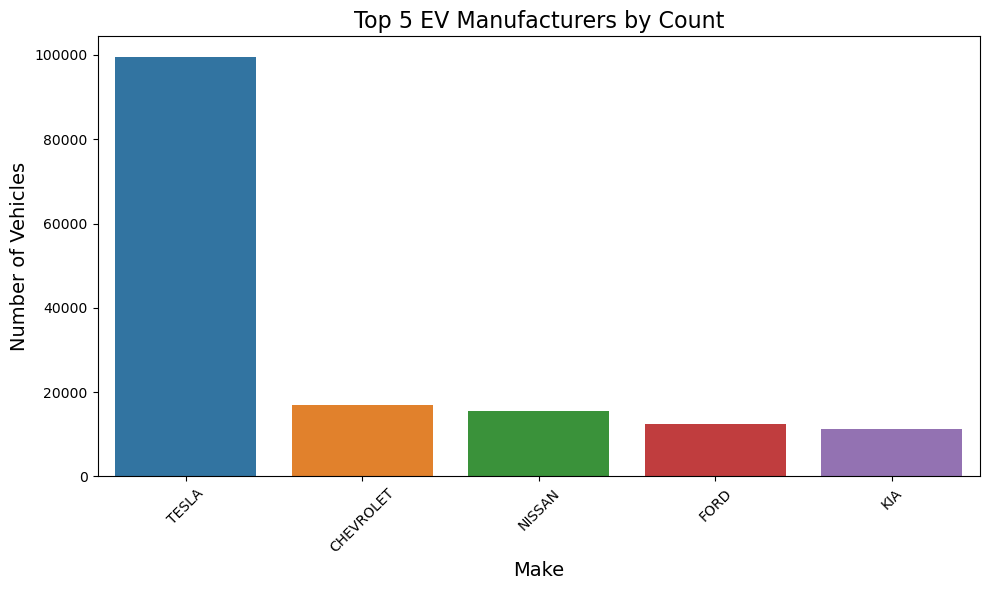

In [25]:
top_makes = raw_data['Make'].value_counts().nlargest(5).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title('Top 5 EV Manufacturers by Count', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()